In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import numpy as np
from dask import dataframe as dd
from minisom import MiniSom
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = dd.read_csv(
    "/glm/city_state.csv"
).groupby(
    ['city', 'datetime']
).aggregate(
    {'total': 'sum'}
).reset_index().compute().pivot(
     columns='city', index='datetime', values='total'
).reset_index()
df.head()

city,datetime,Abel Figueiredo,Acaraú,Acará,Acopiara,Acrelândia,Acreúna,Adamantina,Adustina,Afonso Bezerra,...,Água Boa,Água Clara,Água Comprida,Água Doce,Água Doce do Norte,Água Fria de Goiás,Águas Belas,Águas Formosas,Érico Cardoso,Óbidos
0,2020-01-01 00:00:00,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,1
1,2020-01-01 01:00:00,0,0,0,0,0,0,0,0,0,...,411,0,0,0,0,0,0,0,0,0
2,2020-01-01 02:00:00,0,0,0,0,0,0,0,0,0,...,432,0,3,0,0,0,0,0,0,0
3,2020-01-01 03:00:00,0,0,0,0,0,0,0,0,0,...,665,0,0,0,0,0,0,0,0,0
4,2020-01-01 04:00:00,0,0,0,3,0,0,0,0,0,...,238,0,0,0,0,0,0,0,0,0


In [3]:
df['datetime'] = dd.to_datetime(df['datetime'])
df = df.set_index('datetime')
df.head()

city,Abel Figueiredo,Acaraú,Acará,Acopiara,Acrelândia,Acreúna,Adamantina,Adustina,Afonso Bezerra,Afonso Cláudio,...,Água Boa,Água Clara,Água Comprida,Água Doce,Água Doce do Norte,Água Fria de Goiás,Águas Belas,Águas Formosas,Érico Cardoso,Óbidos
datetime,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,0,0,0,0,0,1
2020-01-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,411,0,0,0,0,0,0,0,0,0
2020-01-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,432,0,3,0,0,0,0,0,0,0
2020-01-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,665,0,0,0,0,0,0,0,0,0
2020-01-01 04:00:00,0,0,0,3,0,0,0,0,0,0,...,238,0,0,0,0,0,0,0,0,0


In [4]:
norm = MinMaxScaler(feature_range=(0, 1))

data = norm.fit_transform(df.values.T)

In [5]:
data.shape

(1439, 8784)

In [ ]:
nr, nc = 6, 6
sigma = 3
neigh_func = 'gaussian'
topology = 'rectangular'

som = MiniSom(
    x=nr, y=nc, input_len=data.shape[1], sigma=sigma, 
    learning_rate=0.05, neighborhood_function=neigh_func,
    topology=topology,
    random_seed=42
)

# som.random_weights_init(data)
som.pca_weights_init(data)
som.train_random(data=data, num_iteration=500)

In [ ]:
W = som.get_weights()
q = som.activation_response(data)

In [ ]:
plt.pcolor(W[:,:,0].T, cmap='coolwarm')
plt.xticks(np.arange(nr+1))
plt.yticks(np.arange(nc+1))
plt.tight_layout()

/home/adriano/sthunder/.venv/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  


(0.0, 6.0)

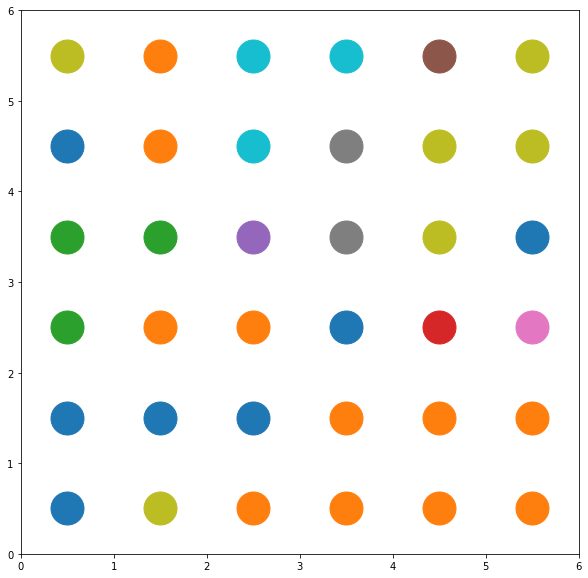

In [35]:
feature_names = ['f%d'%(i+1) for i in range(data.shape[1])]
Z = np.zeros((nr, nc))
plt.figure(figsize=(10, 10))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='o', markersize=33)

# legend_elements = [Patch(facecolor='C'+str(i),
#                          edgecolor='w',
#                          label=f) for i, f in enumerate(feature_names)]

# plt.legend(handles=legend_elements,
#            loc='center left',
#            bbox_to_anchor=(1, .95))
        
plt.xlim([0, nr])
plt.ylim([0, nc])

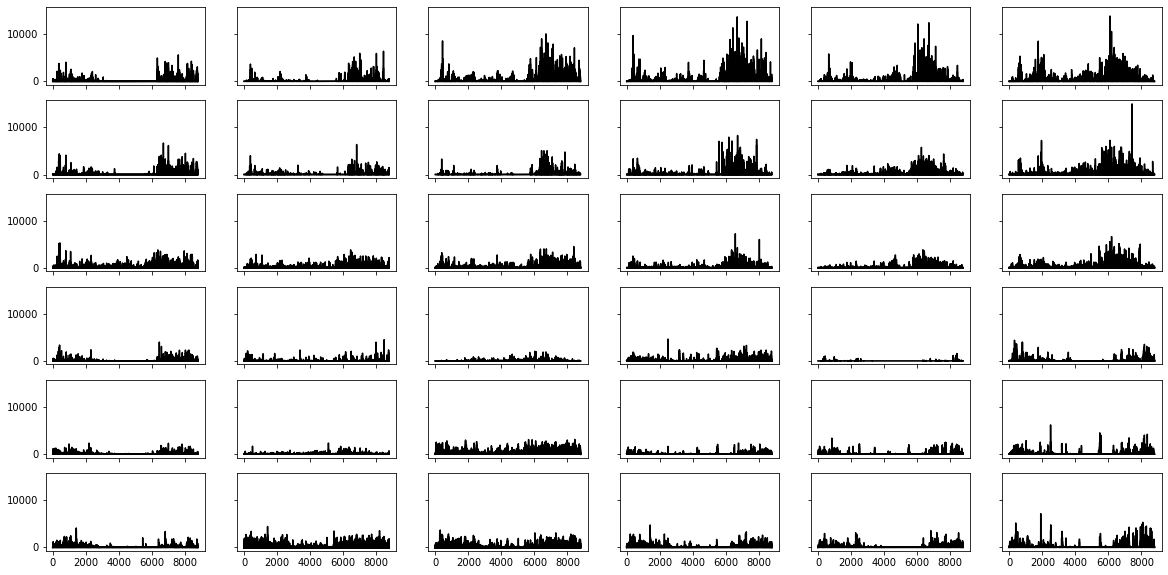

In [36]:
fig, ax = plt.subplots(W.shape[0], W.shape[1], figsize=(20, 10), sharex=True, sharey=True)

for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        ax[i][j].plot(W[i, j], color='gray')
#         ax[i][j].set_xlim(0, 4)
#         ax[i][j].set_xticklabels({v: i for i, v in enumerate(columns[:-1])}, rotation=90)
        

colors = {"Iris-setosa": "red", "Iris-virginica": "green", "Iris-versicolor": "blue"}

temp = norm.inverse_transform(data)
for i, v in enumerate(data):
    winner = som.winner(v)
    ax[winner[0]][winner[1]].plot(temp[i, :], color='k')
    

# laxe = fig.add_axes([0.27, -0.02, 0.5, 0.05])
# for k, v in colors.items():
#     laxe.plot([], c=v, label=k)
# laxe.legend(loc='center', ncol=len(colors.keys()), fontsize=15)
# laxe.axis('off')

In [123]:
norm.inverse_transform(data)

array([[  0.,   0.,   0., ..., 379., 369.,  33.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  47.,   7.,   0.],
       ...,
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  1.,   0.,   0., ...,   0.,   0.,   0.]])

In [120]:
v.shape

(8784,)

In [117]:
data.shape

(1439, 8784)

In [118]:
som.winner(data[0, :])

(2, 1)